In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


# Data gathering

parameters for a random dataset. 

This dataset will have 10 features per sample and 3 different classes. \


---

Each Class has a label between 0-2 and 10 features. 

Each feature, is a random number drawn from a certain normal distribution which is fixed for each class, and rounded to an integer between 0-10.

1.   "P_below", label=0, normal dist = (below_center, below_std)
2.   "P_bingo", label=1, normal dist = (3, bingo_std)
3.   "P_below", label=2, normal dist = (above_center, above_std)



class parameters

In [3]:
sample_per_class = 300
features = 10


In [4]:
below_center = 0  #@param {type:"slider", min:0, max:2, step:1}
below_std = 2  #@param {type:"slider", min:0, max:5, step:1}


In [5]:
bingo_center = 3
bingo_std = 2  #@param {type:"slider", min:0, max:5, step:1}


In [6]:
above_center = 6  #@param {type:"slider", min:4, max:10, step:1}
above_std = 3  #@param {type:"slider", min:0, max:5, step:1}


data generation

In [7]:
p_below = np.clip(np.random.normal(loc=below_std, scale=below_std, size=(sample_per_class, features)).astype(int),
                  a_min=0, a_max=8)
p_bingo = np.clip(np.random.normal(loc=bingo_center, scale=bingo_std, size=(sample_per_class, features)).astype(int),
                  a_min=0, a_max=8)
p_above = np.clip(np.random.normal(loc=above_center, scale=above_std, size=(sample_per_class, features)).astype(int),
                  a_min=0, a_max=8)

data_cols = [f'game_{idx + 1 }' for idx in range(features)]
label_col = ['label']
df = pd.DataFrame(index=range(sample_per_class * 3), columns=data_cols + label_col)
df[data_cols] = np.concatenate([p_below, p_bingo, p_above])
for idx_class in range(3):
    start_idx = 300 * idx_class
    end_idx = (300 * (idx_class + 1)) - 1
    df.loc[start_idx:end_idx, label_col] = idx_class

X = df[data_cols].to_numpy(dtype=float)
y = df[label_col].to_numpy(dtype=float)


A print of the data - BEFORE the PCA

In [8]:
display(df)


,game_1,game_2,game_3,game_4,game_5,game_6,game_7,game_8,game_9,game_10,label
0,6,6,1,2,6,0,0,1,1,0,0
1,1,4,2,0,0,1,0,3,4,1,0
2,0,1,0,2,2,2,0,0,3,1,0
3,1,0,3,0,2,1,4,0,0,1,0
4,0,0,0,1,3,6,1,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
895,6,7,6,5,5,8,4,8,4,3,2
896,4,7,8,5,0,2,2,3,3,8,2
897,7,7,8,1,8,7,7,1,7,6,2
898,4,8,0,5,3,2,3,5,2,7,2


# PCA part

apply PCA to 2 dimentions 

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(columns=['C1', 'C2'],
                      data=X_pca
                      )
pca_df['label'] = y


Visualize

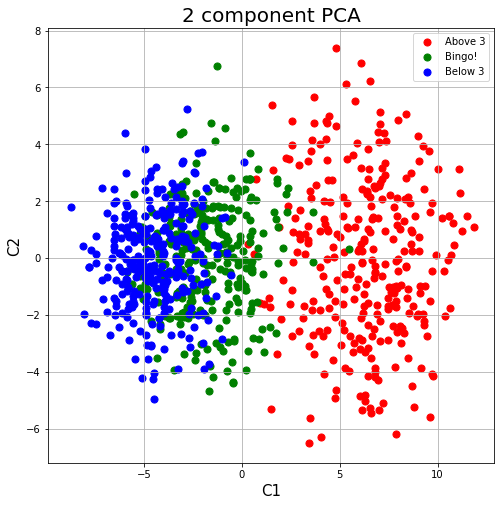

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('C1', fontsize=15)
ax.set_ylabel('C2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [2, 1, 0]
colors = ['r', 'g', 'b']
labels = {0: "Below 3", 1: "Bingo", 2: "Above 3",}
for target, color in zip(targets, colors):
    indicesToKeep = pca_df['label'] == target
    pca_df.loc[indicesToKeep, 'C1']
    pca_df.loc[indicesToKeep, 'C2']
    ax.scatter(pca_df.loc[indicesToKeep, 'C1'],
               pca_df.loc[indicesToKeep, 'C2'],
               c=color,
               s=50,
               label=labels[target],
               )
ax.legend()
ax.grid()


The data AFTER PCA

In [18]:
display(pca_df)


,C1,C2,label
0,-2.575684,-0.697515,0.0
1,-4.790890,-0.792963,0.0
2,-6.548710,1.120723,0.0
3,-6.250025,0.177807,0.0
4,-4.647119,3.050731,0.0
...,...,...,...
895,7.830727,-1.075058,2.0
896,3.472560,-5.636322,2.0
897,8.620516,1.005989,2.0
898,2.558670,-1.128322,2.0
